Counting sort, Bucket sort and Radix Sort

### Counting Sort

In [1]:
def counting_sort(A):
    max_A = max(A)
    C = []
    for i in range(max_A+1):
        C.append(0)
    
    for i in range(len(A)):
        C[A[i]] = C[A[i]] + 1
    
    for i in range(1, len(C)):
        C[i] = C[i] + C[i-1]
    
    B = []
    for i in range(len(A)):
        B.append(0)
    
    for i in range(len(A)-1, -1, -1):
        B[C[A[i]]-1] = A[i]
        C[A[i]] = C[A[i]] - 1
    
    return B
    

In [2]:
A = [6,0,2,0,1,3,4,6,1,3,2]
B = counting_sort(A)
print(B)

[0, 0, 1, 1, 2, 2, 3, 3, 4, 6, 6]


### Radix Sort

In [3]:
def counting_sort_radix(A, digit):
    max_digit = max(digit)
    C = []
    for i in range(max_digit+1):
        C.append(0)
    
    for i in range(len(digit)):
        C[digit[i]] = C[digit[i]] + 1
    
    for i in range(1, len(C)):
        C[i] = C[i] + C[i-1]
    
    B = []
    for i in range(len(A)):
        B.append(0)
    
    for i in range(len(digit)-1, -1, -1):
        B[C[digit[i]]-1] = A[i]
        C[digit[i]] = C[digit[i]] - 1
    
    return B

def radix_sort(A, d):
    a = A
    for i in range(1, d+1):
        if i>1:
            a = [int(e/(10**(i-1))) for e in A]
        digit = [e%10 for e in a]
#         print(a,digit,i)
        A = counting_sort_radix(A, digit)
    return A
        
    

In [4]:
A = [329, 457, 657, 839, 436, 720, 355]
# C = [60,0,24,0,12,38,44,61,13,39,20]
D = radix_sort(A, 3)
D

[329, 355, 436, 457, 657, 720, 839]

### Bucket Sort

In [5]:
def nest_simple(B):
    if (type(B) is list):
        for el in B:
            if ((type(el) is list) and len(el)!=0) or type(el) is not list:
                b = nest_simple(el)
                if type(b) is not list:
                    C.append(b)
    return B

def insertion_sort(array):
    for j in range(1, len(array)):
        key = array[j]
        i = j-1
        while i>=0 and array[i]>key:
            array[i+1] = array[i]
            i = i - 1
        array[i+1] = key
    return array

def bucket_sort(A):
    B = [None]*len(A)
    n = len(A)
    for i in range(n):
        B[i] = []
    for i in range(n):
        B[int(n*A[i])].append(A[i])
    for i in range(n):
        B[i] = insertion_sort(B[i])
        
    return B
    

In [6]:
A = [0.78,0.17,0.39,0.26,0.72,0.94,0.21,0.12,0.23,0.68]
B = bucket_sort(A)
print("Without concatenation output from bucket sort:\n", B)
global C
C = []
nest_simple(B)
print("After concatenation output from bucket sort:\n", C)


Without concatenation output from bucket sort:
 [[], [0.12, 0.17], [0.21, 0.23, 0.26], [0.39], [], [], [0.68], [0.72, 0.78], [], [0.94]]
After concatenation output from bucket sort:
 [0.12, 0.17, 0.21, 0.23, 0.26, 0.39, 0.68, 0.72, 0.78, 0.94]


### Comparing Radix sort and Bucket sort with Quicksort

In [7]:
import time
import math
import numpy as np
import matplotlib.pyplot as plt

def insertion_time(loopcount, array):
    start = np.zeros(loopcount)
    end = np.zeros(loopcount)
    for i in np.arange(loopcount):
        start[i] = time.time()
        insertion_sort(array)
        end[i] = time.time()
    timetaken = np.mean(end-start)
    return timetaken

def radix_time(loopcount, array, d):
    start = np.zeros(loopcount)
    end = np.zeros(loopcount)
    for i in np.arange(loopcount):
        start[i] = time.time()
        radix_sort(array, d)
        end[i] = time.time()
    timetaken = np.mean(end-start)
    return timetaken

def bucket_time(loopcount, array):
    start = np.zeros(loopcount)
    end = np.zeros(loopcount)
    for i in np.arange(loopcount):
        start[i] = time.time()
        bucket_sort(array)
        end[i] = time.time()
    timetaken = np.mean(end-start)
    return timetaken

def counting_time(loopcount, array):
    start = np.zeros(loopcount)
    end = np.zeros(loopcount)
    for i in np.arange(loopcount):
        start[i] = time.time()
        counting_sort(array)
        end[i] = time.time()
    timetaken = np.mean(end-start)
    return timetaken

In [8]:
import matplotlib.pyplot as plt

arraysize = 4000 #max size of n
loopcount = 10 #averaging multiple time periods on same operation for better result
array = []
nsize = []
time_bucket = []
time_insertion = []
time_radix = []
for i in np.arange(arraysize):
    array.append(i)
    if i%50==0:
        time_insertion.append(insertion_time(loopcount, array))
        time_radix.append(radix_time(loopcount, array, d=4))
        nsize.append(len(array))


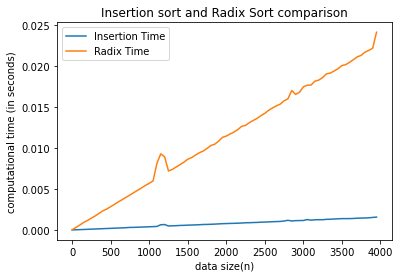

In [9]:
plt.figure()
plt.plot(nsize, time_insertion, label='Insertion Time')
plt.plot(nsize, time_radix, label='Radix Time')
plt.xlabel('data size(n)')
plt.ylabel('computational time (in seconds)')
plt.title("Insertion sort and Radix Sort comparison")
plt.legend()

plt.show()
    

In [10]:
import matplotlib.pyplot as plt

arraysize = 4000 #max size of n
loopcount = 10 #averaging multiple time periods on same operation for better result
array = []
nsize = []
time_bucket = []
time_insertion = []
time_radix = []
for i in np.arange(arraysize):
    array.append(i/4001)
    if i%50==0:
        time_insertion.append(insertion_time(loopcount, array))
        time_bucket.append(bucket_time(loopcount, array))
        nsize.append(len(array))

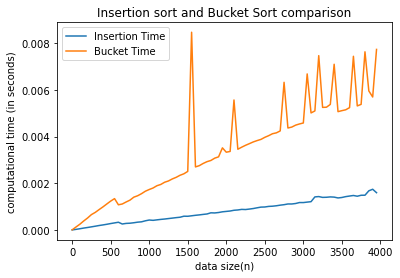

In [11]:
plt.figure()
plt.plot(nsize, time_insertion, label='Insertion Time')
plt.plot(nsize, time_bucket, label='Bucket Time')
plt.xlabel('data size(n)')
plt.ylabel('computational time (in seconds)')
plt.title("Insertion sort and Bucket Sort comparison")
plt.legend()

plt.show()
    

### Counting Sort vs Insertion Sort

In [12]:
import matplotlib.pyplot as plt

arraysize = 4000 #max size of n
loopcount = 10 #averaging multiple time periods on same operation for better result
array = []
nsize = []
time_counting = []
time_insertion = []
for i in np.arange(arraysize):
    array.append(i)
    if i%50==0:
        time_insertion.append(insertion_time(loopcount, array))
        time_counting.append(counting_time(loopcount, array))
        nsize.append(len(array))

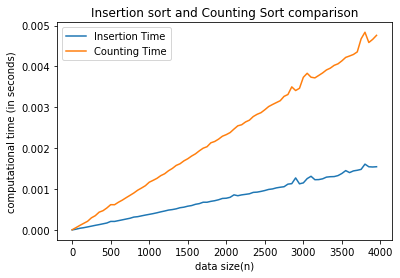

In [13]:
plt.figure()
plt.plot(nsize, time_insertion, label='Insertion Time')
plt.plot(nsize, time_counting, label='Counting Time')
plt.xlabel('data size(n)')
plt.ylabel('computational time (in seconds)')
plt.title("Insertion sort and Counting Sort comparison")
plt.legend()

plt.show()
    